Table of Content :

1. [Introduction](#intro)
2. [General Information & Data Preprocessing](#pra-pemrosesan)
3. [Prioritizing Hypothesis](#hypothesis)
4. [A/B Testing Analysis](#a/btesting)
5. [Conclusion](#conclusion)

# A/B Testing Analysis of Online Shop Web Traffic 

<a id="intro"></a>
## Introduction

This project consists of three different datasets, which are :

1. Data of list hypothesis
2. Data of all purchase order 
3. Data of users' visit

### Goals :

This project aims to conduct A/B testing analysis of online shop web traffic, to determine result of the test or on how the test will be proceeded

### Steps :
1. Generate Information of Datasets
2. Data Preprocessing
3. Prioritizing Hypothesis
4. A/B Test Analysis

<a id="pra-pemrosesan"></a>
## General Information & Data Preprocessing

Import Python libraries.

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math as mt
import math
import numpy as np
import seaborn as sns

Read all three datasets.

In [155]:
try :
    hypothesis = pd.read_csv('hypotheses_us.csv', sep=';')
    order_table = pd.read_csv('orders_us.csv')
    visit = pd.read_csv('visits_us.csv')

except :
    hypothesis = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
    order_table = pd.read_csv('/datasets/orders_us.csv')
    visit = pd.read_csv('/datasets/visits_us.csv')

### Hypothesis Table

Checking general information of the first dataset, that consists of :

- Hypotheses : brief elaboration of hypothesis
- Reach : users scope, scale one to ten
- Impact : impact to the users, scale one to ten
- Confidence : hypothesis confidence, scale one to ten
- Effort : sumber daya yang diperlukan untuk menguji hipotesis, scale one to ten - the higher the score is, the more intensive the resource test is.

In [156]:
hypothesis.info()
hypothesis.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


(9, 5)

In [157]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


Dataset only consists of nine rows, and there is no any issue found on it.

### Orders Table

Checking general information of second dataset, that consists of :

- transactionId : transcation/order ID
- visitorId : user ID
- date : date of the transaction
- revenue : total revenue of the order
- group : testing group (A/B) 

In [158]:
order_table.info()
order_table.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


(1197, 5)

In [159]:
order_table.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [160]:
order_table.shape

(1197, 5)

Checking dataset to look for any duplicate or missing values.

In [161]:
order_table.isna().sum() #checking any missing value in the data

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [162]:
order_table.duplicated().sum() #checking any duplicated value in the data

0

There are no any duplicate or missing values found on dataset. However, `date` column is in incorrect data type, thus, it need to be fixed. 

Fixing data type for column `date`.

In [163]:
order_table['date'] = pd.to_datetime(order_table['date'], format='%Y-%m-%d')
order_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


Checking any duplicate of `visitorId` that might be in both groups.

Selecting `visitorId` from group A.

In [164]:
dftmpA = order_table[order_table['group'] == 'A'][['visitorId', 'group']]

Selecting `visitorId` from group B.

In [165]:
dftmpB = order_table[order_table['group'] == 'B'][['visitorId', 'group']]

Merge both filtered data, to check any duplication.

In [166]:
df_intersection = dftmpA.merge(dftmpB, on = 'visitorId', how= 'inner')
df_intersection

,visitorId,group_x,group_y
0,4069496402,A,B
1,199603092,A,B
2,199603092,A,B
3,199603092,A,B
4,199603092,A,B
...,...,...,...
178,4186807279,A,B
179,4186807279,A,B
180,2712142231,A,B
181,2949041841,A,B


There are 183 visitors found duplicated in both groups. Considering there is no enough information of these duplicated `visitorId` on which group they belong to, these duplicated `visitorId` will be removed.

Remove duplicated `visitorId`.

In [167]:
visitorId_drop = df_intersection['visitorId'].unique()

In [168]:
order = order_table[~order_table['visitorId'].isin(visitorId_drop)].reset_index(drop=True)

Checking new filtered `order` table data.

In [169]:
order.shape

(1016, 5)

In [170]:
order.describe()

,transactionId,visitorId,revenue
count,1.016000e+03,1.016000e+03,1016.000000
mean,2.155085e+09,2.128677e+09,130.770866
std,1.234372e+09,1.221578e+09,648.079810
min,1.062393e+06,5.114589e+06,5.000000
25%,1.143481e+09,1.043655e+09,20.775000
50%,2.144499e+09,2.150274e+09,50.100000
75%,3.256513e+09,3.146991e+09,126.950000
max,4.288552e+09,4.283872e+09,19920.400000


### Visits Table

Checking general information of third dataset, that consists of :

- date : date of web visit
- group : testing group (A/B)
- visits : total of visits on particular date of each group testing

In [171]:
visit.info()
visit.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


(62, 3)

In [172]:
visit.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [173]:
visit.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Checking dataset to look for any duplicate or missing values.

In [174]:
visit.isna().sum() #checking any missing value in the data

date      0
group     0
visits    0
dtype: int64

In [175]:
visit.duplicated().sum() #checking any duplicated value in the data

0

There are no any duplicate or missing values found on dataset. However, date column is in incorrect data type, thus, it need to be fixed.

Fixing data type for column date.

In [176]:
visit['date'] = pd.to_datetime(visit['date'], format='%Y-%m-%d')
visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


<a id="hypothesis"></a>
## Prioritizing Hypothesis 

Apply `ICE` framework to prioritize hypothesis.

In [177]:
hypothesis['ICE'] = (hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Effort']

hypothesis[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


Apply `RICE` framework to prioritize hypothesis.

In [178]:
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Effort']

hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


Findings :

By applying `ICE` and `RICE` framework to the hypothesis, it is found that top three prioritized hypothesis are different in each of framework. `ICE` framework provides that top three hypothesis are number 8, 0, and 7 in order, meanwhile `RICE` framework define that number 7, 2, and 0 are on the top three. However, it is also concluded that hypothesis number 7 and number 0 are consistently on the top three of both framework.

<a id="a/btesting"></a>
## A/B Testing Analysis

### Cumulative Metric Stability

Checking cumulative metric stability, as one of method to check on how to proceed the test based on analysis result. To conduct the analysis, first we need the filtered data that contain of cumulative data of both datasets : visit table and order table to gain cumulative revenue and order.

In [126]:
datesGroups = order[['date','group']].drop_duplicates() #make dataframe that consists of date unique of each testing group
datesGroups.head()

,date,group
0,2019-08-15,B
6,2019-08-15,A
35,2019-08-16,A
37,2019-08-16,B
45,2019-08-01,A


Calculate cumulative total amount of `transactionId` nunique, `visitorId` nunique, and total revenue of `order` table data. 

In [127]:
ordersAggregated = datesGroups.apply(
    lambda x: order[
        np.logical_and(
            order['date'] <= x['date'], order['group'] == x['group'])
    ].agg(
        {
            'date' : 'max', 
            'group' : 'max',                                    
            'transactionId' : pd.Series.nunique, 
            'visitorId' : pd.Series.nunique, 
            'revenue' : 'sum'
        }
    ), axis=1).sort_values(by=['date','group'])

ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
45,2019-08-01,A,23,19,2266.6
54,2019-08-01,B,17,17,967.2
149,2019-08-02,A,42,36,3734.9
147,2019-08-02,B,40,39,3535.3
245,2019-08-03,A,66,60,5550.1


Calculate cumulative total amount of `visits` from `visit` table data.

In [128]:
visitorsAggregated = datesGroups.apply(
    lambda x: visit[
        np.logical_and(
            visit['date'] <= x['date'], visit['group'] == x['group'])
    ].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), 
    axis=1).sort_values(by=['date','group'])

visitorsAggregated.head()

,date,group,visits
45,2019-08-01,A,719
54,2019-08-01,B,713
149,2019-08-02,A,1338
147,2019-08-02,B,1294
245,2019-08-03,A,1845


Merge both cumulative data, of total orders, buyers, revenue, and visitors. 

In [129]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors'] #rename columns name after merged

cumulativeData.head() 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


Grouping cumulative revenue of each testing group, for comparison.

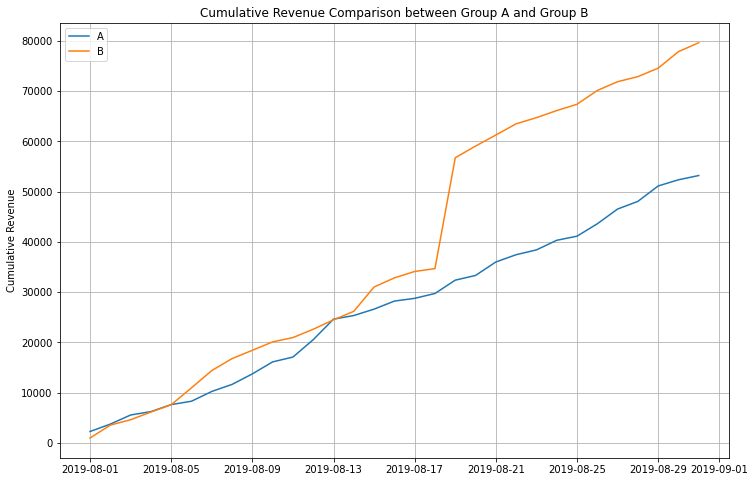

In [130]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']] #filter data of group A
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']] #filter data of group B

plt.figure(figsize=(12, 8))
 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Cumulative Revenue Comparison between Group A and Group B')
plt.ylabel('Cumulative Revenue')
plt.grid(True)
plt.show()

It is shown on graph above that Group B has higher total cumulative revenue compare with Group A, although the revenue of both groups increased over the time. It is also described that in first days, group A has slightly higher cumulative revenue than group B.


Checking cumulative average purchase of each group.

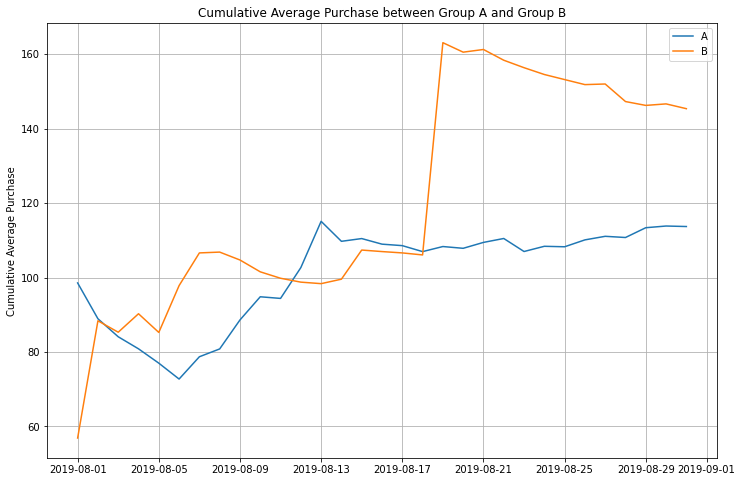

In [131]:
plt.figure(figsize=(12, 8))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('Cumulative Average Purchase between Group A and Group B')
plt.ylabel('Cumulative Average Purchase')
plt.grid(True)
plt.show()

On the graph above it is shown that Group B has higher cumulative average purchase compare to Group A, but on the first days and in the middle of period of time, group A has slightly higher cumulative average than group B for a time.   


Checking relative difference of cumulative average purchase order of Group B compare to Group A, as Group B come with higher purchase order than group A on previous graph.

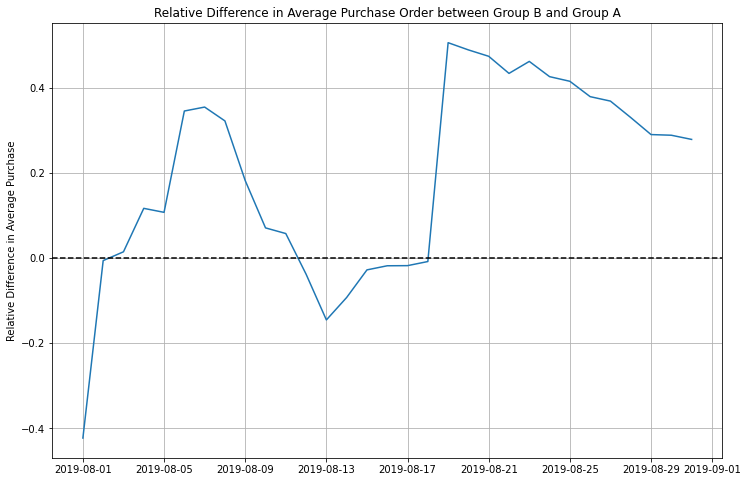

In [132]:
# merge both cumulative revenue of Group A and Group B to be one dataframe
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 8))

# make a graph of relative difference in average purchase order of Group B compare to Group A
plt.plot(mergedCumulativeRevenue['date'], 
         ((mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA']))-1)

plt.axhline(y=0, color='black', linestyle='--')

plt.ylabel('Relative Difference in Average Purchase')
plt.title('Relative Difference in Average Purchase Order between Group B and Group A')
plt.grid(True)
plt.show()

Graph above shows that Group A has higher average purchase order on August 1st and 13th only, while on the rest date, Group B has higher average purchase order compare to Group A with the highest cumulative order is on around August 20th that might be caused of anomaly data due to large purchase order on this particular time.  


Checking cumulative conversion rate of each Group as the ratio of total purchase order to total visitors everyday.

(18110.0, 18141.0, 0.0, 0.05)

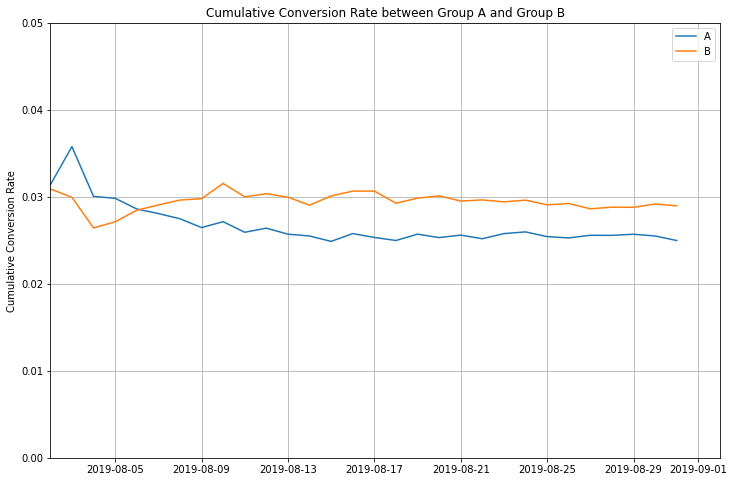

In [133]:
# calculate cumulative conversion rate 
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(12, 8))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.ylabel('Cumulative Conversion Rate')
plt.title('Cumulative Conversion Rate between Group A and Group B')
plt.grid(True)

plt.axis([pd.to_datetime('2019-08-02'), pd.to_datetime('2019-09-02'), 0, 0.05])

In the beginning of testing, Group A has higher conversion rate compare to Group B, however, Group B gradually increase the rate and stable on the same rate of value.  

Checking relative difference of cumulative conversion rate of Group B compare to Group A, as Group B come with higher conversion rate than group A on previous graph.

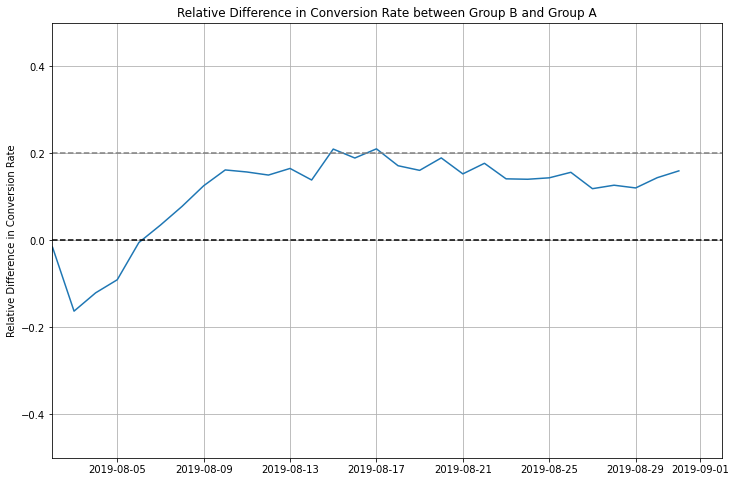

In [134]:
# merge both cumulative conversion rate of Group A and Group B to be one dataframe
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', 
                                                                           right_on='date', 
                                                                           how='left', 
                                                                           suffixes=['A', 'B'])

plt.figure(figsize=(12, 8))

# make a graph of relative difference in conversion rate of Group B compare to Group A
plt.plot(mergedCumulativeConversions['date'], 
         (mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-02'), pd.to_datetime('2019-09-02'), -0.5, 0.5])

plt.ylabel('Relative Difference in Conversion Rate')
plt.title('Relative Difference in Conversion Rate between Group B and Group A')
plt.grid(True)
plt.show()

As it is shown above that Group A has higher cumulative conversion rate in the beginning of test than Group B. Then Group B gradually increasing the rate and even higher than Group A, but it is not that significantly higher as described above compare to Group A. 

### Analyzing Outliers & Extreme Value

Make scatter chart of total order per `visitorId`. 

count    973.000000
mean       1.044193
std        0.238090
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: orders, dtype: float64

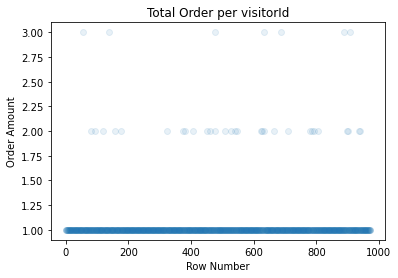

In [135]:
# Calculate total transaction per visitor, by making dataframe consists of the two columns

ordersByVisitor = (
    order.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByVisitor.columns = ['visitorId', 'orders'] #rename column name

x_values = pd.Series(range(0,len(ordersByVisitor)))

plt.scatter(x_values, ordersByVisitor['orders'], alpha=0.1)
plt.xlabel('Row Number')
plt.ylabel('Order Amount')
plt.title('Total Order per visitorId')

ordersByVisitor['orders'].describe()

Calculate percentile 95th and 99th of total order per `visitorId`.

In [136]:
np.percentile(ordersByVisitor['orders'], [90, 95, 99])

array([1., 1., 2.])

Total buyers who make more than one order is not more than 5%, and the one who make more than two order is not more than 1%. Thus, it can be concluded that purchase order with total two order per buyer as the lower line of total order, and also to filter the anomaly.

Make scatter chart to check revenue distribution.

count     1016.000000
mean       130.770866
std        648.079810
min          5.000000
25%         20.775000
50%         50.100000
75%        126.950000
max      19920.400000
Name: revenue, dtype: float64

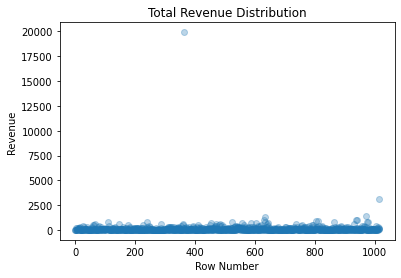

In [137]:
x_values = pd.Series(range(0,len(order['revenue'])))

plt.scatter(x_values, order['revenue'], alpha=0.3)
plt.xlabel('Row Number')
plt.ylabel('Revenue')
plt.title('Total Revenue Distribution')

order['revenue'].describe()

Calculate percentile 95th and 99th of column `revenue`.

In [138]:
np.percentile(order['revenue'], [90, 95, 99])

array([280.8  , 414.275, 830.3  ])

Total buyers who make order with total revenue more than `$414.27` is not more than `5%`, and the one who make order with total revenue more than `$830.3` is not more than 1%. Thus, it can be concluded that purchase order with total revenue `$414.27` as the lower line of total order, and also to filter the anomaly.

### Statistic Significance Difference

#### Conversion Rate of Raw Data

Checking statistic significance difference of conversion rate between groups using raw data.

Create `ordersByUsersA` variable for buyer who make at least one purchase order from group A to count total order per buyer.

In [139]:
ordersByUsersA = order[order['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersA.head()

,userId,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


Create `ordersByUsersB` variable for buyer who make at least one purchase order from group B to count total order per buyer.

In [ ]:
ordersByUsersB = order[order['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

ordersByUsersB.head()

Create `SampleA` variable to compile data of visitors who make at least one purchase order (or more), and visitors who does not make any order from group A

In [141]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, 
                                index=np.arange(visit[visit['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), 
                                name='orders')],axis=0)

Create `SampleB` variable to compile data of visitors who make at least one purchase order (or more), and visitors who does not make any order from group B

In [142]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, 
                                index=np.arange(visit[visit['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), 
                                name='orders')],axis=0)

Calculate statistic significance difference of conversion rate between `SampleA` and `SampleB` data by conducting Mann-Whitney testing, to examine following hypothesis :

Alpha = 0.05

H0 = p-value > alpha : There is no statistic significance difference found on conversion rate between groups

H1 = p-value < alpha : There is statistic significance difference found on conversion rate between groups

In [152]:
print('Conversion Rate Difference (p-value): ', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Relative Conversion Rate  : ', "{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

Conversion Rate Difference (p-value):  0.011
Relative Conversion Rate  :  0.160


P-value is lower than alpha means we have enough evidence to reject the Null Hypothesis. Raw data analysis reveals that there is significance difference found on conversion rate between the two groups statistically. And it is found that relative conversion rate of group B is 16% higher than group A. 

#### Average Revenue of Raw Data

Checking statistic significance difference in average revenue between groups using raw data by conducting Mann-Whitney testing, to examine following hypothesis :

Alpha = 0.05

H0 = p-value > alpha : There is no statistic significance difference found on average revenue between groups

H1 = p-value < alpha : There is statistic significance difference found on average revenue between groups

In [151]:
print('P-value : ', '{0:.3f}'.format(stats.mannwhitneyu(order[order['group']=='A']['revenue'], order[order['group']=='B']['revenue'])[1]))
print('Relative Value : ', '{0:.3f}'.format(order[order['group']=='B']['revenue'].mean()/order[order['group']=='A']['revenue'].mean()-1))

P-value :  0.862
Relative Value :  0.278


P-value is higher than alpha means we do not have enough evidence to reject the Null Hypothesis. Raw data analysis reveals that there is no significance difference found on average revenue between the two groups statistically. And it is found that relative average revenue of group B is 28% higher than group A. 

#### Conversion Rate of Filtered Data

Checking statistic significance difference of conversion rate between groups using filtered data.

As we need filtered data (data without outliers), first we need to identify anomaly data of abnormal users behaviour : the one who make too many purchase order (`usersWithManyOrders`); and the one who make very expensive orders, affect to be too high revenues (`usersWithExpensiveOrders`). Then, compile these two variables, that contain anomaly data of abnormal users behaviour, to be one dataframe (`abnormalUsers`).

In [145]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 1]['userId']], axis = 0)

usersWithExpensiveOrders = order[order['revenue'] > 414.27]['visitorId']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

abnormalUsers.head(5)

487    113298937
937    148427295
792    204675465
33     249864742
586    358944393
dtype: int64

Create `SampleA` variable to compile data of visitors who make at least one purchase order (or more), and visitors who does not make any order from group A, using filtered data by removing anomaly data (`abnormalUsers`).

In [146]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, 
                            index=np.arange(visit[visit['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),
                            name='orders')],axis=0)

Create `SampleB` variable to compile data of visitors who make at least one purchase order (or more), and visitors who does not make any order from group B, using filtered data by removing anomaly data (`abnormalUsers`).

In [147]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, 
                            index=np.arange(visit[visit['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),
                            name='orders')],axis=0)

Calculate statistic significance difference of conversion rate between `SampleA` and `SampleB` filtered data by conducting Mann-Whitney testing, to examine following hypothesis :

Alpha = 0.05

H0 = p-value > alpha : There is no statistic significance difference found on conversion rate between groups

H1 = p-value < alpha : There is statistic significance difference found on conversion rate between groups

In [150]:
print('Conversion Rate Difference (p-value): ', "{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Relative Value : ', "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Conversion Rate Difference (p-value):  0.01593
Relative Value :  0.174


P-value is lower than alpha means we have enough evidence to reject the Null Hypothesis. Filtered data analysis reveals that there is significance difference found on conversion rate between the two groups statistically, as same as in raw data analysis. And it is found that group B is relatively 17% higher than group A.

#### Average Revenue of Filtered Data

Checking statistic significance difference in average revenue between groups using filtered data by conducting Mann-Whitney testing, to examine following hypothesis :

Alpha = 0.05

H0 = p-value > alpha : There is no statistic significance difference found on average revenue between groups

H1 = p-value < alpha : There is statistic significance difference found on average revenue between groups

In [149]:
print('P-value : ', '{0:.3f}'.format(stats.mannwhitneyu(
    order[np.logical_and(
        order['group']=='A',
        np.logical_not(order['visitorId'].isin(abnormalUsers)))]['revenue'],
    order[np.logical_and(
        order['group']=='B',
        np.logical_not(order['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('Relative Value : ','{0:.3f}'.format(
    order[np.logical_and(order['group']=='B',np.logical_not(order['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    order[np.logical_and(
        order['group']=='A',
        np.logical_not(order['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

P-value :  0.771
Relative Value :  -0.033


P-value is higher than alpha means we do not have enough evidence to reject the Null Hypothesis. Filtered data analysis reveals that there is no significance difference found on average revenue between the two groups statistically. And it is found that group A is only 3.3% higher than group B.

<a id="conclusion"></a>
## Conclusion

A/B Testing Results:

1. Both raw data and filtered data show statistically significant differences in conversion rates between the groups.
2. Both raw data and filtered data do not show statistically significant differences in average order sizes between the groups.
3. The graph illustrating the difference in conversion rates between the groups indicates that Group B performs better, but the improvement is not statistically significant.
4. The graph illustrating the difference in average order sizes between the groups shows that Group B outperforms Group A.


Based on the presented A/B testing results, the recommended course of action is to:

- Stop the test, as it can be considered that group B outperforms group A in general.